# Analyzing Health, Nutrition & Population Statistics from the World Bank
<br></br>

## HealthStats EDA (DSI CS1 Practice)

### Dustin Eubanks
___

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<br></br>
## Initial Analysis
<br></br>
Use `.shape`, `.columns`, and `.index.values` to take a look at the rows and columns we have available:

In [172]:
df = pd.read_csv('../data/data.csv')

print(f'Shape: {df.shape}', '\n')

print(f'Columns: {df.columns}', '\n')

print(f'Index: {df.index.values}')

Shape: (89010, 61) 

Columns: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object') 

Index: [    0     1     2 ... 89007 89008 89009]


<br></br>
<br></br>
<br></br>
Look at the `.info()`:

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

<br></br>
<br></br>
That last column doesn't have anything in it, so we'll `drop` it.

In [159]:
df.drop(columns=['Unnamed: 60'], inplace=True)

<br></br>
Also we are starting to see that we have a high occurrence of `NaN` values in this data.

Use `.count()` to check the number of non-null values, and `.isna()` to check the nulls.  Use `.sum()` to add them:

In [160]:
# Function to count percent of NaNs in a dataframe, in case we need to do this again later
def count_nans(dataframe):
    nans = df.isna().sum().sum()
    non_nas = df.count().sum().sum()
    total = nans + non_nas

    return f'{nans} NaNs in {total} total values, or {round(nans / total * 100, 2)}% NaN'

count_nans(df)

'2508518 NaNs in 5340600 total values, or 46.97% NaN'

<br></br>
<br></br>
**_That's a lot of missing values!_**   _Next..._
<br></br>
<br></br>
Use `.iloc[:, :]` and `.drop_duplicates()` to analyze the unique values in the **Incidator Name** & **Indicator Code** columns.

Use `.sort_values()` and `.reset_index()` to sort data in alphabetical order & add a new index.  The old index values will become a new column - use `.drop()` to get rid of it.

Use `inplace=True` parameter to manipulate the DataFrame in place (not return a copy) where needed.

In [161]:
indicators = df.iloc[:, 2:4]
indicators.drop_duplicates(inplace=True)
indicators.sort_values(by=['Indicator Name'], inplace=True)
indicators.reset_index(inplace=True)
indicators.drop(columns=['index'], inplace=True)
indicators

,Indicator Name,Indicator Code
0,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS
1,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS
2,AIDS estimated deaths (UNAIDS estimates),SH.DYN.AIDS.DH
3,ARI treatment (% of children under 5 taken to ...,SH.STA.ARIC.ZS
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT
...,...,...
340,Use of any antimalarial drug (% of pregnant wo...,SH.MLR.PREG.ZS
341,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS
342,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS
343,Wanted fertility rate (births per woman),SP.DYN.WFRT


<br></br>
<br></br>
**_NOTE:_** Better practice to use `.loc` for indexing when possible...

Use `.loc[:, :]` to refer by **row index** and / or **column name** instead of integer reference (`.iloc`).  (see next cell)

<br></br>
Analyze the unique values in the **Country Name** & **Country Code** columns, same as we did the Indicators above:
<br></br>

In [162]:
regions = df.loc[:, 'Country Name':'Country Code']
regions.drop_duplicates(inplace=True)
regions.sort_values(by=['Country Name'], inplace=True)
regions.reset_index(inplace=True)
regions.drop(columns=['index'], inplace=True)
regions

,Country Name,Country Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,ADO
...,...,...
253,West Bank and Gaza,WBG
254,World,WLD
255,"Yemen, Rep.",YEM
256,Zambia,ZMB


<br></br>
## Let's drill down now into some of the different groups & indicators:

In [173]:
# Function to create a dataframe with all INDICATORS for a single COUNTRY
# Sort and organize it a bit.  Transpose to get the years as rows.
def data_by_country(country):
    df_country = df.copy(deep=True)
    df_country = df_country[df_country['Country Name'] == country]
    df_country.sort_values(by=['Indicator Name'], inplace=True)
    df_country.rename(columns={'Indicator Name': country}, inplace=True)
    df_country.set_index(country, inplace=True)
    df_country = df_country.transpose(copy=True)
    df_country.drop(index=['Country Code', 'Indicator Code', 'Country Name'], inplace=True)
    return df_country

In [174]:
# Same function, but creates a dataframe with all COUNTRIES for a single INDICATOR
def data_by_indicator(indicator_name):
    df_indicator = df.copy(deep=True)
    df_indicator = df_indicator[df_indicator['Indicator Name'] == indicator_name]
    df_indicator.sort_values(by=['Country Name'], inplace=True)
    df_indicator.rename(columns={'Country Name': indicator_name}, inplace=True)
    df_indicator.set_index(indicator_name, inplace=True)
    df_indicator = df_indicator.transpose(copy=True)
    df_indicator.drop(index=['Country Code', 'Indicator Code', 'Indicator Name'], inplace=True)
    return df_indicator

In [164]:
df_AFG = data_by_country('Afghanistan')
df_AFG.head()

Afghanistan,% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),AIDS estimated deaths (UNAIDS estimates),ARI treatment (% of children under 5 taken to a health provider),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female",...,Urban population,Urban population (% of total),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",Use of any antimalarial drug (% of pregnant women),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%)
1960,NaN,NaN,NaN,NaN,145.321,NaN,NaN,NaN,NaN,NaN,...,739462,8.221,5.25381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,145.321,NaN,NaN,NaN,NaN,NaN,...,779754,8.508,5.30556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,145.321,NaN,NaN,NaN,NaN,NaN,...,822719,8.805,5.36362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,145.321,NaN,NaN,NaN,NaN,NaN,...,868325,9.11,5.39514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,145.321,NaN,NaN,NaN,NaN,NaN,...,917022,9.426,5.45654,NaN,NaN,NaN,NaN,NaN,NaN,NaN


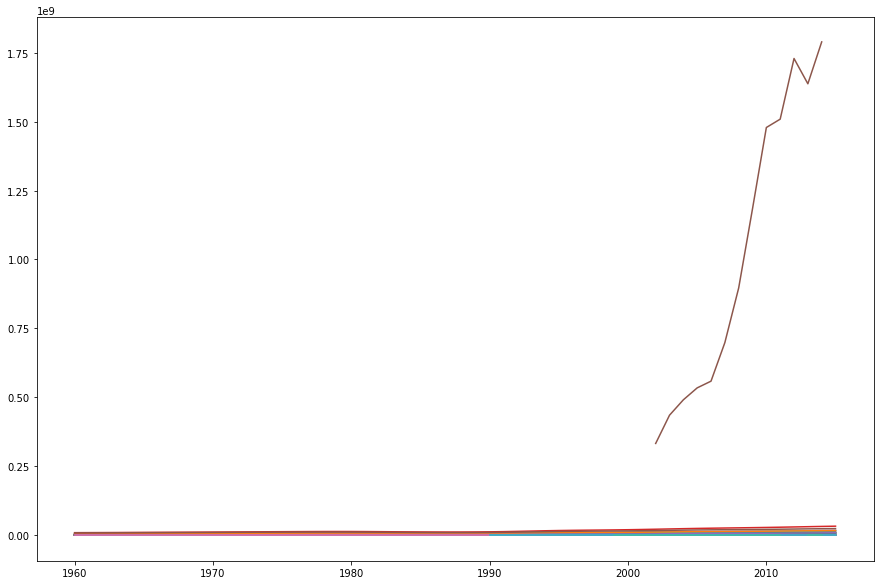

In [178]:
# drop all 100% NaN rows or columns to clean up the data
df_AFG.dropna(axis = 1, how='all', inplace=True)
df_AFG.dropna(axis = 0, how='all', inplace=True)

df_AFG.plot(figsize=(15,10), legend=False);

<br></br>
Possibly something worth pursuing in that flattened bit at the bottom, but comparing all indicators (with many different & varying scales) doesn't make much sense.  For now let's switch it up & take a look at identical indicators between different groups in the data:

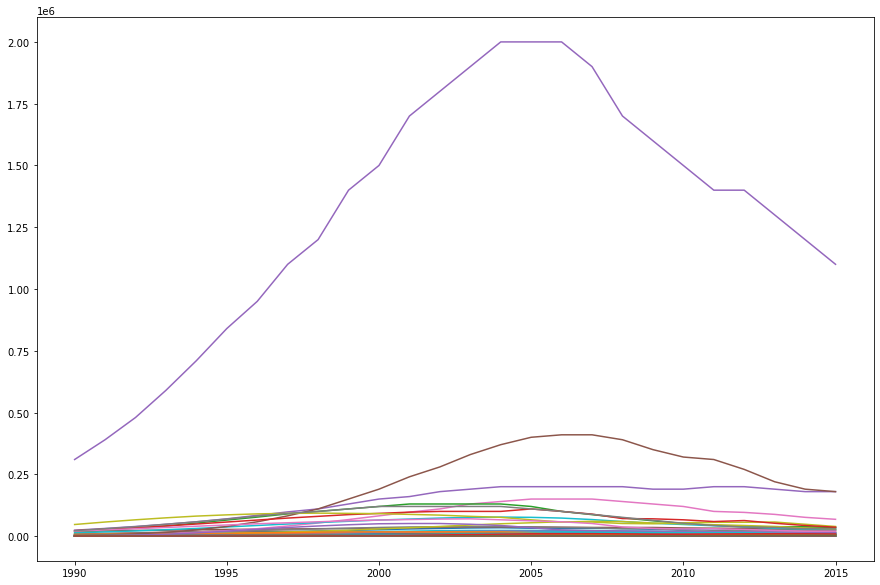

In [177]:
df_AIDS_deaths.dropna(axis = 1, how='all', inplace=True)
df_AIDS_deaths.dropna(axis = 0, how='all', inplace=True)

df_AIDS_deaths.plot(figsize=(15,10), legend=False);

<br></br>
<br></br>
That looks interesting.  We have a (somewhat) more informative graph than the last one.  There is an outlier flattening the bunch, but it looks like it could be a cumulative sum of all the values below.  In truth we are plotting way too many lines to make much sense here.
<br></br>
<br></br>
Next we'll slice the dataset down further and compare some specific groups & indicators:

In [167]:
# Function creates a new dataframe from a [list] of group names, for the specified indicator name (e.g. AIDS deaths)
def compare_groups_by_indicator(groups, indicator):
    if len(groups) < 2: return "Need at least 2 groups to compare"
    
    df_ = data_by_indicator(indicator)
    df_new = df_[groups].copy(deep=True)
    df_new.dropna(axis = 1, how='all', inplace=True)
    df_new.dropna(axis = 0, how='all', inplace=True)
    return df_new

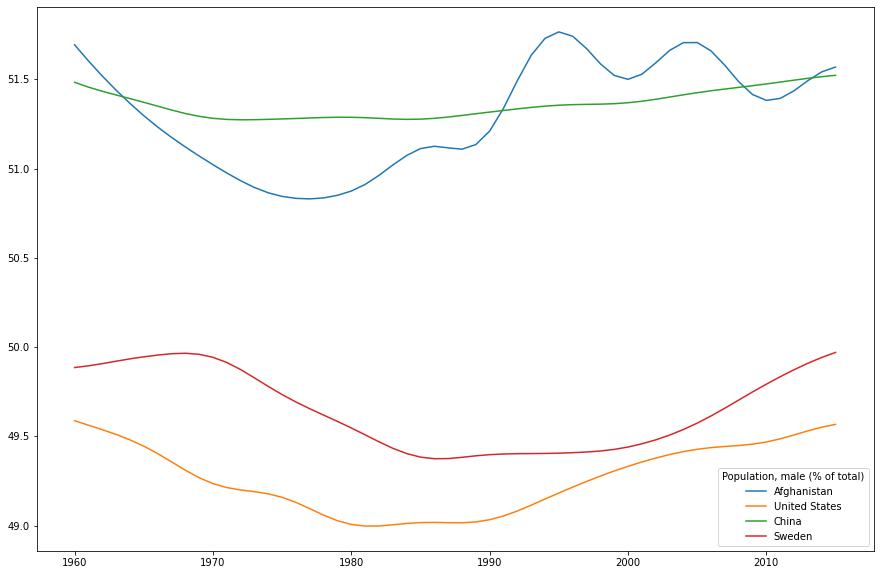

In [181]:
rand_countries = ['Afghanistan','United States', 'China', 'Sweden']
indicator = 'Population, male (% of total)'
df_male_pop = compare_groups_by_indicator(rand_countries, indicator) 
df_male_pop.plot(figsize=(15,10));

<br></br>
<br></br>
Now we are seeing some meaningful visualizations of the data.  Let's do the same with different groups & indicators:

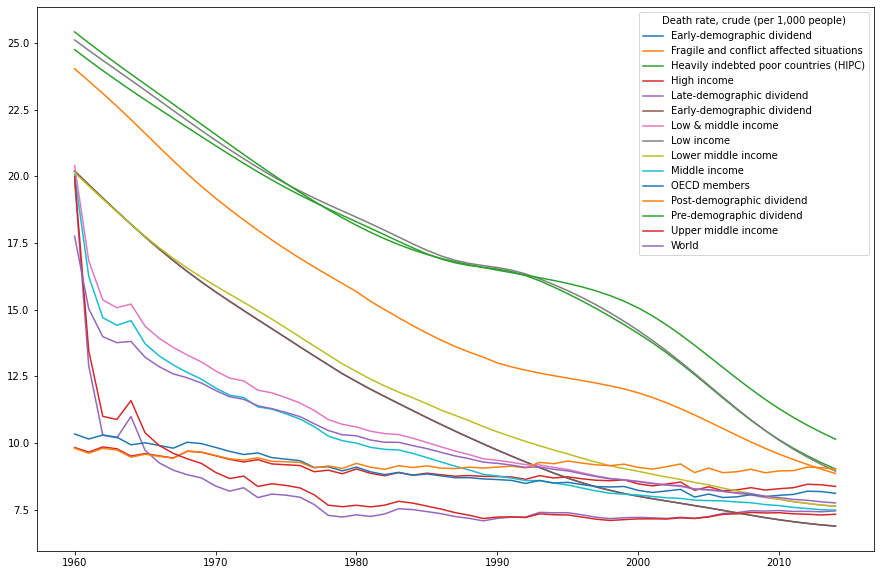

In [169]:
rand_groups = ['Early-demographic dividend',
                  'Fragile and conflict affected situations', 
                  'Heavily indebted poor countries (HIPC)', 
                  'High income', 
                  'Late-demographic dividend',
                  'Early-demographic dividend',
                  'Low & middle income',
                  'Low income',
                  'Lower middle income',
                  'Middle income',
                  'OECD members',
                  'Post-demographic dividend',
                  'Pre-demographic dividend',
                  'Upper middle income',
                  'World']

indicator = 'Death rate, crude (per 1,000 people)'
df_death_rate = compare_groups_by_indicator(rand_groups, indicator) 
df_death_rate.plot(figsize=(15,10));

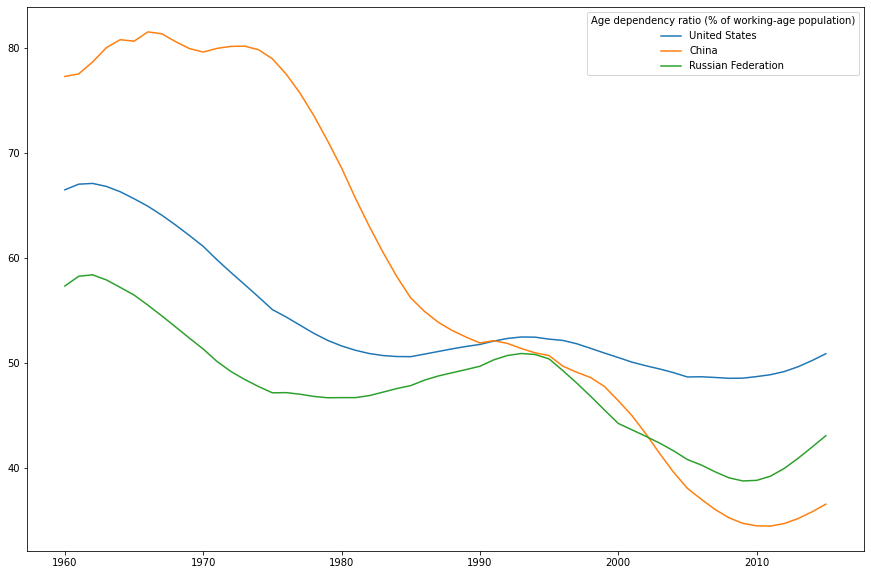

In [180]:
super_powers = ['United States', 'China', 'Russian Federation']
indicator = 'Age dependency ratio (% of working-age population)'
df_age_dependency = compare_groups_by_indicator(super_powers, indicator) 
df_age_dependency.plot(figsize=(15,10));

In [90]:
# fig, ax = plt.subplots(figsize=(12,6))

# barheights = [x for x in df_AIDS_deaths.count()]
# barlabels = df_AIDS_deaths.columns

# ax.bar(range(len(barheights)), barheights)
# ax.set_xticks(range(len(barheights)))
# ax.set_title('AIDS Deaths')
# ax.set_xticklabels(barlabels, rotation=45);